# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)






In [3]:
# Combine the data into a single DataFrame # Display the data table for preview

combined_data=pd.merge(mouse_metadata,study_results,on="Mouse ID",how='outer')
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


249

In [9]:
# Checking the number of mice.
number_mice=combined_data["Mouse ID"].nunique()
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.


248

In [13]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_data["Mouse ID"].nunique()

clean_mice_data

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [16]:
summary_stat =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

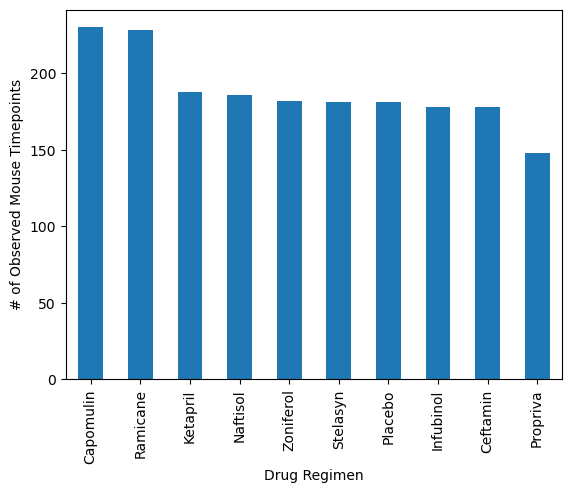

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


In [17]:
mice_timepoints = clean_data["Drug Regimen"].value_counts()
mice_timepoints

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0.5, 1.0, 'Timepoints per Treatment')

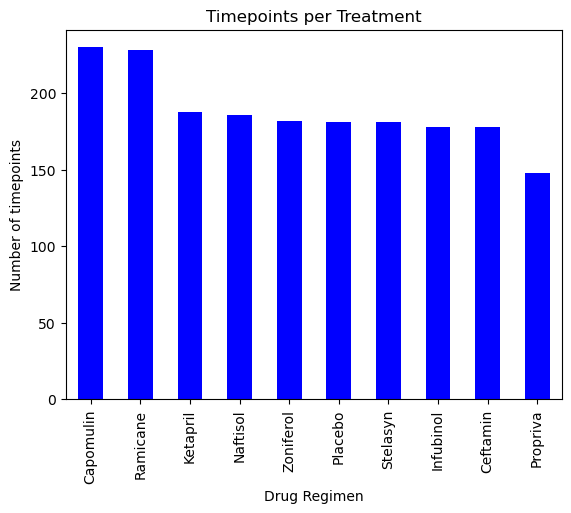

In [21]:
mice_bar_chart=mice_timepoints.plot.bar(color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of timepoints")
plt.title("Timepoints per Treatment")


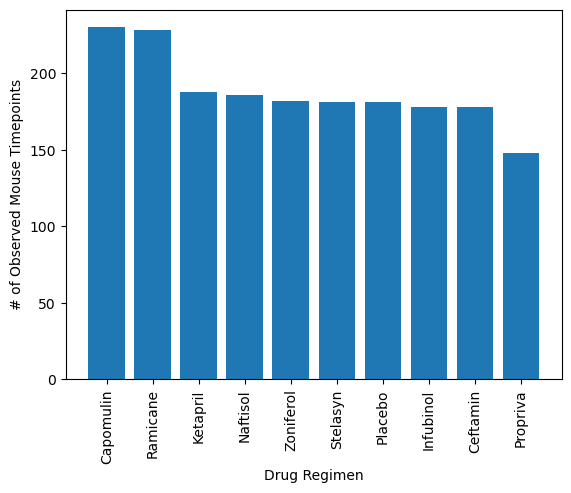

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


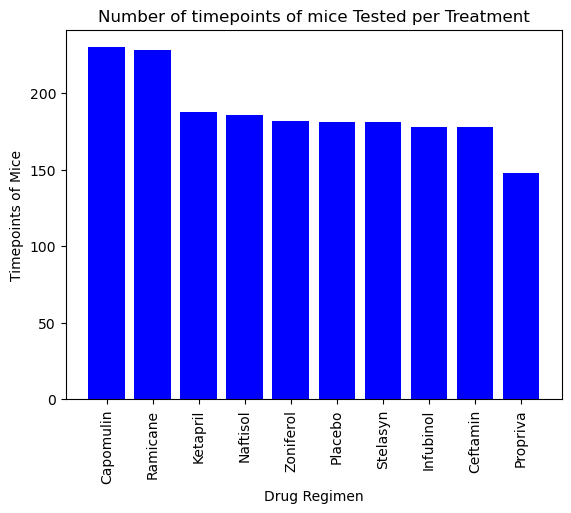

In [22]:

x_axis = mice_timepoints.index.values
y_axis = mice_timepoints.values


plt.bar(x_axis, y_axis, color='b', alpha=1.0, align='center')


plt.title("Number of timepoints of mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints of Mice")
plt.xticks(rotation="vertical")

plt.show()

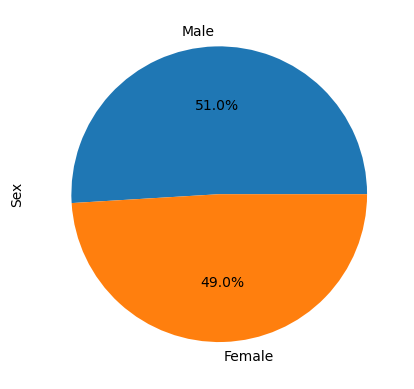

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


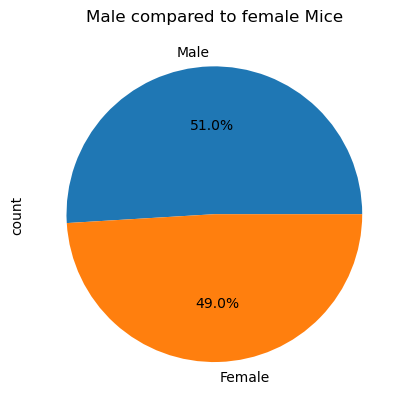

In [23]:

gender_df = clean_data["Sex"].value_counts()
plt.title("Male compared to female Mice")
gender_df.plot.pie(autopct= "%1.1f%%")
plt.show()

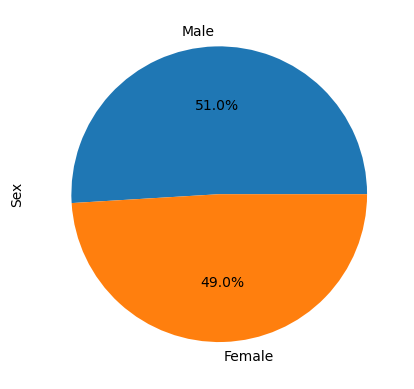

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


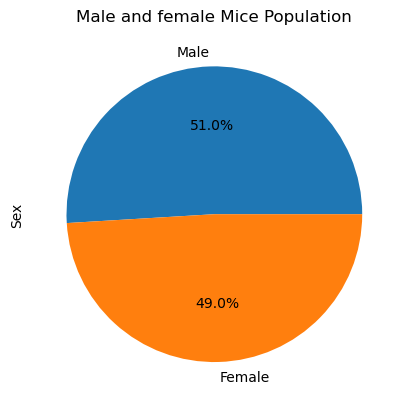

In [24]:
labels = ['Female', 'Male']
sizes = [50, 50.3]
plot = gender_df.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male and female Mice Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [26]:
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

In [27]:
# Capomulin
Capomulin_greatest = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_greatest)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [28]:
Capomulin_tr = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tr.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The Capomulin tumors' lower quartile is : {lowerq}")
print(f"TheThe Capomulin tumors' upper quartile is: {upperq}")
print(f"The Capomulin tumors' interquartile range is : {iqr}")
print(f"The Capomulin tumors' median is: {quartiles[0.5]} ")

lower_level = lowerq - (1.5*iqr)
upper_level = upperq + (1.5*iqr)

print(f"Values below {lower_level} could be outliers.")
print(f"Values above {upper_level} could be outliers.")

The Capomulin tumors' lower quartile is : 32.37735684
TheThe Capomulin tumors' upper quartile is: 40.1592203
The Capomulin tumors' interquartile range is : 7.781863460000004
The Capomulin tumors' median is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [30]:

Ramicane_greatest = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_greatest)
Ramicane_merge = pd.merge(Ramicane_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

Ramicane_merge.to_csv("output.csv")
Ramicane_trs = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_trs.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The Ramicane tumors' lower quartile is: {lowerq}")
print(f"The Ramicane tumors' upper quartile of  is: {upperq}")
print(f"The Ramicane tumors' interquartile range  is: {iqr}")
print(f"The Ramicane tumors' median is: {quartiles[0.5]} ")

lower_level = lowerq - (1.5*iqr)
upper_level = upperq + (1.5*iqr)

print(f"{lower_level} could be outliers of values below.")
print(f"{upper_level} could be outliers of Values above.")

The Ramicane tumors' lower quartile is: 31.56046955
The Ramicane tumors' upper quartile of  is: 40.65900627
The Ramicane tumors' interquartile range  is: 9.098536719999998
The Ramicane tumors' median is: 36.56165229 
17.912664470000003 could be outliers of values below.
54.30681135 could be outliers of Values above.


In [33]:
Infubinol_greatest = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_greatest)
Infubinol_merge = pd.merge(Infubinol_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()
Infubinol_trs = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_trs.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The Infubinol tumors' lower quartile is: {lowerq}")
print(f"The Infubinol tumors' upper quartile is: {upperq}")
print(f"The Infubinol tumors' interquartile quartile is: {iqr}")
print(f"The Infubinol tumors' median is: {quartiles[0.5]} ")

lower_level = lowerq - (1.5*iqr)
upper_level = upperq + (1.5*iqr)


print(f"{lower_level} could be outliers of values below.")
print(f"{upper_level} could be outliers of Values above.")
Infubinol_merge.to_csv("output.csv")

The Infubinol tumors' lower quartile is: 54.04860769
The Infubinol tumors' upper quartile is: 65.52574285
The Infubinol tumors' interquartile quartile is: 11.477135160000003
The Infubinol tumors' median is: 60.16518046 
36.83290494999999 could be outliers of values below.
82.74144559000001 could be outliers of Values above.


In [34]:
# Ceftamin
Ceftamin_greatest = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_greatest)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [35]:
Ceftamin_trs = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_trs.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The temperatures' lower quartile is: {lowerq}")
print(f"The temperatures upper quartile  is: {upperq}")
print(f"The temperatures' interquartile  is: {iqr}")
print(f"The temperatures' median is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_level = lowerq - (1.5*iqr)
upper_level = upperq + (1.5*iqr)

print(f"{lower_level} could be outliers of values below.")
print(f"{upper_level} could be outliers of values above.")

The temperatures' lower quartile is: 48.72207785
The temperatures upper quartile  is: 64.29983003
The temperatures' interquartile  is: 15.577752179999997
The temperatures' median is: 59.85195552 
25.355449580000002 could be outliers of values below.
87.66645829999999 could be outliers of values above.


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [36]:
drug_dic = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data[combined_data["Drug Regimen"].isin(drug_dic)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
timepoint_for_last = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
timepoint_for_last = timepoint_for_last.stack(level=0).unstack(level=0)
for drug in drug_dic:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [38]:
treatment = 0
for drug in drug_dic:
    quartiles = timepoint_for_last[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_level = round(lowerq - (1.5*iqr),2)
    upper_level = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"---------")
    print(f"The {drug} treatments'lower quartile is: {lowerq}")
    print(f"The {drug} treatments' upper quartile is: {upperq}")
    print(f"The {drug} treatments'interquartile range is: {iqr}")
    print(f"Values below {lower_level} could be {drug} outliers.")
    print(f"Values above {upper_level} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

---------
The Capomulin treatments'lower quartile is: 32.38
The Capomulin treatments' upper quartile is: 40.16
The Capomulin treatments'interquartile range is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The Ramicane treatments'lower quartile is: 31.56
The Ramicane treatments' upper quartile is: 40.66
The Ramicane treatments'interquartile range is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The Infubinol treatments'lower quartile is: 54.05
The Infubinol treatments' upper quartile is: 65.53
The Infubinol treatments'interquartile range is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
------------------------------------------------------------
The Ceftamin treatments'lower quartile is: 48.72
The Ceftam

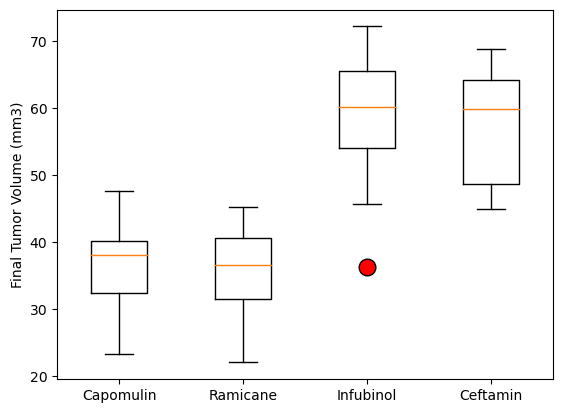

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


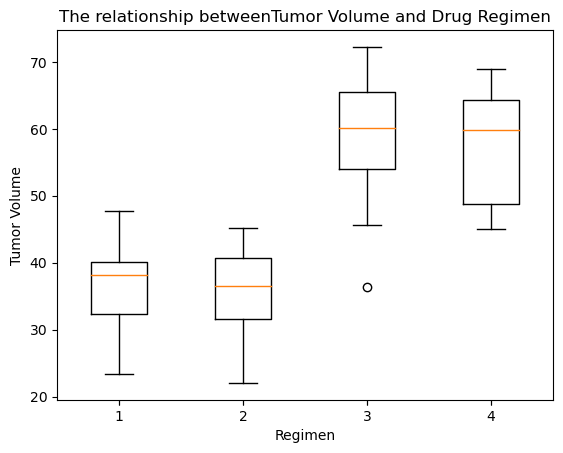

In [42]:
boxplot_list = []
for value in drug_dic:
    boxplot_list.append(list(timepoint_for_last[value].dropna()))

fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Tumor Volume")
plt.title("The relationship betweenTumor Volume and Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

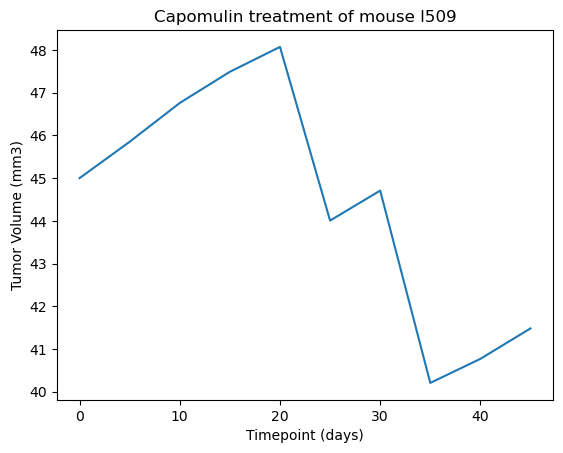

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


Text(0, 0.5, 'Tumor Volume (mm3)')

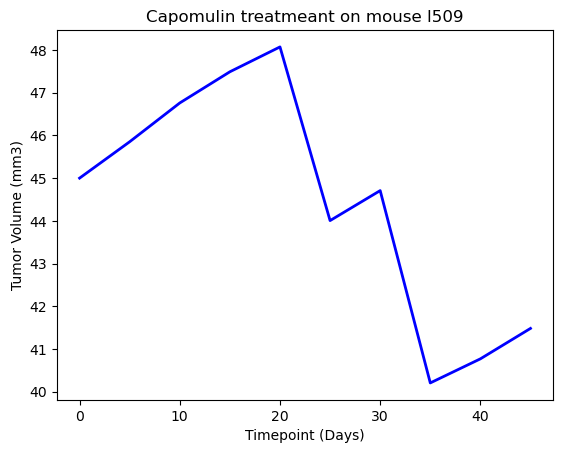

In [43]:
frontline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
frontline_df.head()
x_axis = frontline_df["Timepoint"]
tum_size = frontline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant on mouse l509')
plt.plot(x_axis, tum_size,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

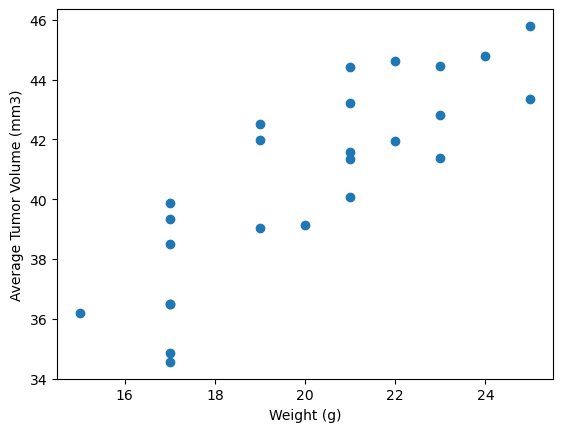

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

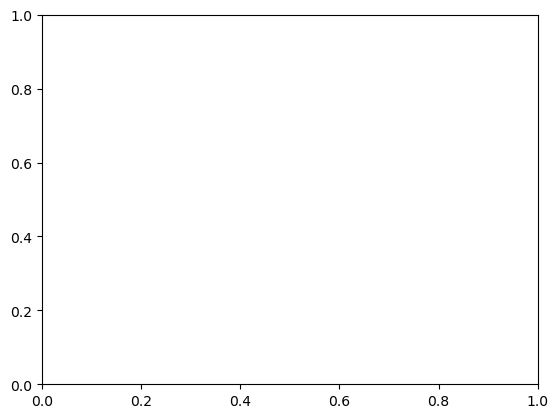

In [69]:
fig1, ax1 = plt.subplots()

avg_cap_data =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_cap_data['Weight (g)'],avg_cap_data['Tumor Volume (mm3)'], color="blue")
plt.title('The relationship between Mouse Weight and Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


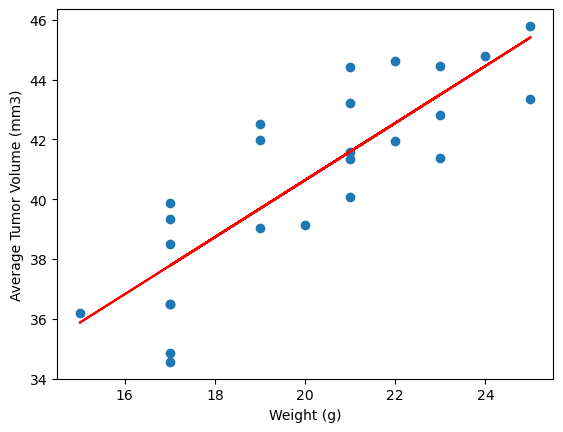

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [62]:
correlation = st.pearsonr(avg_cap_data['Weight(g)'],avg_cap_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

KeyError: 'Weight(g)'

In [71]:
(slope, intercept,rvalue, pvalue, stderr)= lineregress(avg_cap_data["Weight (g)"],avg_cap_data["Tumor Volume (mm3)"])
regress=avg_cap_data["Weight (g)"]* slope + intercept
line= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_cap_data["Weight (g)"],avg_cap_data["Tumor Volume (mm3)"],color='b')
plt.plot(avg_cap_data["Weight (g)"], regress, color='red')
plt.annotate(line,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

NameError: name 'lineregress' is not defined